# Survey Analysis

The following code is used to analyze and visualize data collected from an in-person survey. 

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the data ignoring the first row and using the second row for the column names
# note - full text of questions are available in the first skipped row

data = pd.read_csv('./survey_results_text.csv', skiprows=1, header=0)

# remove survey test row
data = data[data['participant_ID']!='SURVEY TEST']

## Plotting Cross Tabulations

In [4]:
# Create age categories from age data

age = data['participant_age']
age_cutoffs = [0, 30, 40, 50, 60, 100]
age_categories = ['30 and under','31-40', '41-50', '51-60', 'over 60']
data['age_categories'] = pd.cut(age, bins=age_cutoffs, labels=age_categories)

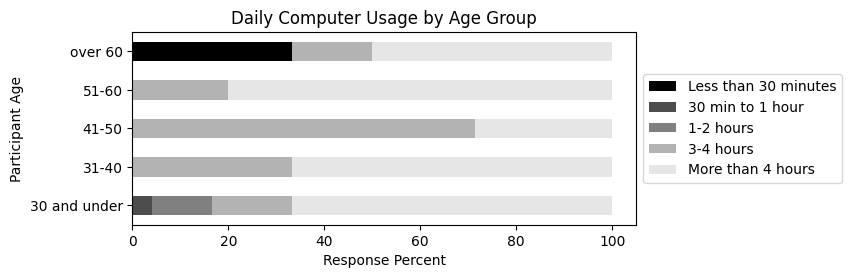

In [5]:
# Create summary data of daily computer usage by age group

summary = pd.crosstab(data['age_categories'], data['computer_time'], normalize='index') * 100
summary = summary[['Less than 30 minutes', '30 min to 1 hour', '1-2 hours', '3-4 hours', 'More than 4 hours']]

# Create a stacked bar graph of the results

from matplotlib.colors import ListedColormap
cmap = ListedColormap([(0, 0, 0), (.3, .3, .3), (.5, .5, .5), (.7, .7, .7), (.9, .9, .9)])
summary.plot(
    kind='barh',
    colormap=cmap,
    stacked=True,
    figsize=(6.5, 2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.title('Daily Computer Usage by Age Group')
plt.xlabel('Response Percent')
plt.ylabel('Participant Age')
plt.savefig('filename.png', dpi=300)

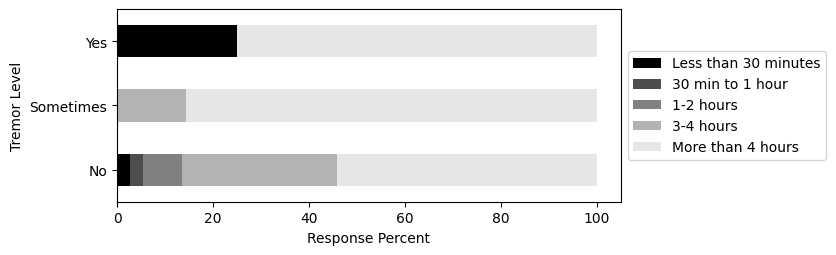

In [6]:
summary = pd.crosstab(data['tremor_level'], data['computer_time'], normalize='index') * 100
summary = summary[['Less than 30 minutes', '30 min to 1 hour', '1-2 hours', '3-4 hours', 'More than 4 hours']]

# Create a stacked bar graph of the results
summary.plot(
    kind='barh',
    colormap=cmap,
    stacked=True,
    figsize=(6.5,2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Response Percent')
plt.ylabel('Tremor Level')
plt.savefig('filename.png', dpi=300)

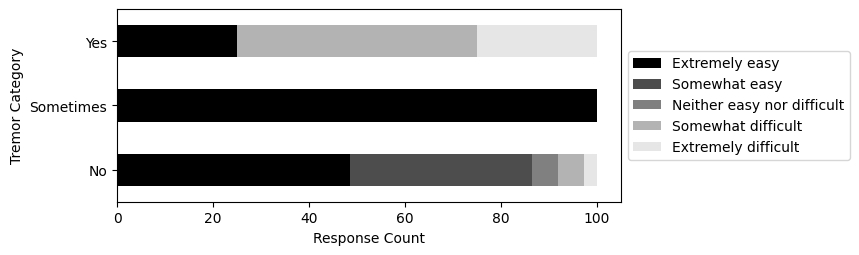

In [7]:
summary = pd.crosstab(data['tremor_level'], data['mouse_challenge_drag'], normalize='index') * 100
summary = summary[['Extremely easy','Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Extremely difficult']]


# Create a stacked bar graph of the results
summary.plot(
    kind='barh',
    colormap=cmap,
    stacked=True,
    legend=True,
    figsize=(6.5,2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Response Count')
plt.ylabel('Tremor Category')
plt.savefig('filename.png', dpi=300)

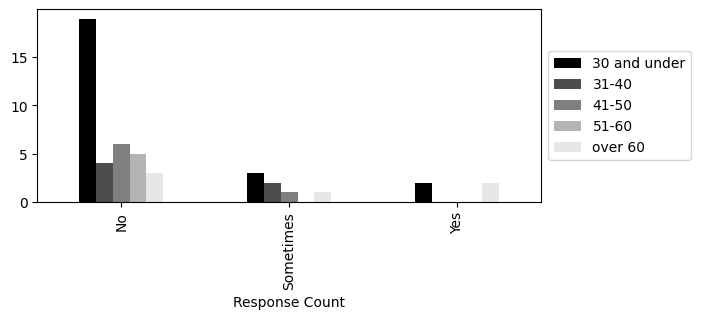

In [8]:
summary = pd.crosstab(data['tremor_level'], data['age_categories'])

# Create a stacked bar graph of the results
summary.plot(
    kind='bar',
    colormap=cmap,
    stacked=False,
    figsize=(6.5,2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


plt.xlabel('Response Count')
plt.savefig('filename.png', dpi=300)

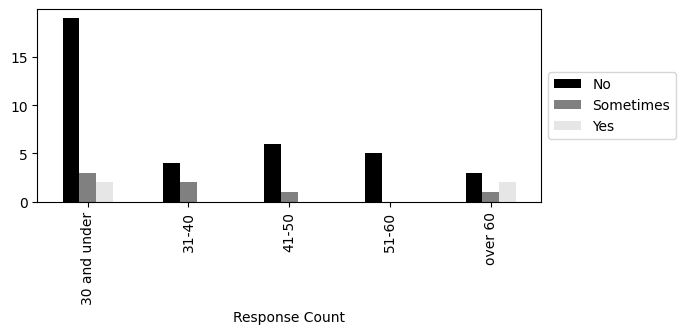

In [9]:
summary = pd.crosstab(data['age_categories'], data['tremor_level'])

# Create a stacked bar graph of the results
summary.plot(
    kind='bar',
    colormap=cmap,
    stacked=False,
    figsize=(6.5,2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


plt.xlabel('Response Count')
plt.savefig('filename.png', dpi=300)

## Quantified Plots

In [10]:
data = pd.read_csv('./survey_results_numerical.csv', skiprows=1, header=0)
data = data[data['participant_ID']!='SURVEY TEST']

challenge_mean = pd.pivot_table(data,
                             values=['mouse_challenge_click', 'mouse_challenge_drag', 'mouse_challenge_move', 'mouse_challenge_scroll'],
                             columns='tremor_level',
                             aggfunc='mean')

challenge_std = pd.pivot_table(data,
                             values=['mouse_challenge_click', 'mouse_challenge_drag', 'mouse_challenge_move', 'mouse_challenge_scroll'],
                             columns='tremor_level',
                             aggfunc='mean')


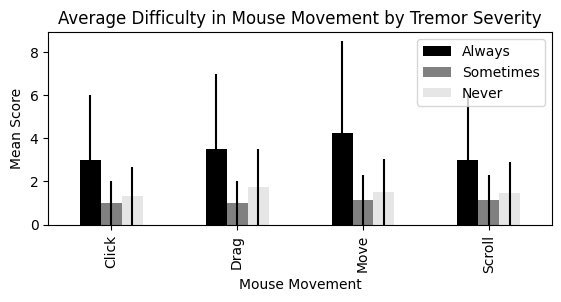

In [14]:
# Create a stacked bar graph of the results
ax = challenge_mean.plot(
    kind='bar',
    yerr=challenge_std,
    colormap=cmap,
    stacked=False,
    legend=True,
    figsize=(6.5,2.5))

xlabels = ['Click', 'Drag', 'Move', 'Scroll']
ax.set_xticklabels(xlabels)
ax.legend(['Always', 'Sometimes', 'Never'])

plt.title('Average Difficulty in Mouse Movement by Tremor Severity')
plt.xlabel('Mouse Movement')
plt.ylabel('Mean Score')
plt.savefig('filename.png', dpi=300)

### Correlation Matrix and Heat Map

In [12]:
rows = ['mouse_fatigue_hand', 'mouse_fatigue_wrist', 'mouse_fatigue_arm']
cols = ['mouse_challenge_click', 'mouse_challenge_drag', 'mouse_challenge_move', 'mouse_challenge_scroll']

# Compute correlation matrix
cor_matrix = data[rows+cols].corr(method='pearson')
cor_slice = cor_matrix.loc[rows, cols]
cor_slice

,mouse_challenge_click,mouse_challenge_drag,mouse_challenge_move,mouse_challenge_scroll
mouse_fatigue_hand,-0.098662,-0.283477,-0.190195,-0.294086
mouse_fatigue_wrist,-0.105708,-0.284074,-0.184624,-0.155947
mouse_fatigue_arm,-0.149521,-0.363560,-0.133517,-0.184434


<Axes: >

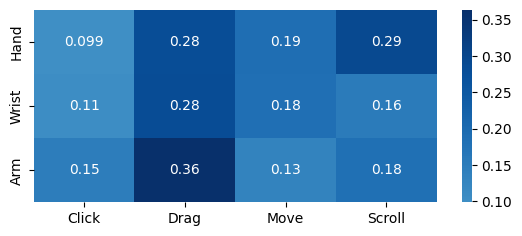

In [13]:
import seaborn as sns

cor_slice.columns = ['Click', 'Drag', 'Move', 'Scroll']
cor_slice.index = ['Hand', 'Wrist', 'Arm']

plt.figure(figsize=(6.5,2.5))
sns.heatmap(abs(cor_slice), annot=True, cmap='Blues', center=0)